In [1]:
import numpy as np
from auxiliarymethods import  datasets as dp 
import auxiliarymethods.auxiliary_methods as aux
from sklearn.metrics.cluster import normalized_mutual_info_score
from matplotlib import pyplot as plt
from auxiliarymethods import reader
import pandas as pd
from sources import graph_analysis,clustering,dimensionality_reduction,outlier_detection, visualization, utility_functions
import networkx as nx
import seaborn as sns

## Exploratory Data Analysis

Load imdb-network:

To limit the sheer amount of exploratory data analysis that could be done on this dataset, we developed the following three questions, which we will try to explore and answer:


1. **How do the corresponding ego-graphs of outliers look like?**
2. **Do  self-developed features help us distinguish between the romance/action clusters when plotting in 2D/3D?**
3. **How well do the clusters agree between each other when comparing the pairwise NMI scores of the different kernel representation?**


Before starting with the first question, we load the data and do some basic graph analysis/plot the most important features to get some first impression of the imdb dataset and the different kernel representation. 

In [2]:
imdb_networkx = reader.tud_to_networkx("IMDB-BINARY")

Load each dataset and save it in variables:

In [3]:
classes = dp.get_dataset("IMDB-BINARY")
imdb_wl1_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl1.npz"))
imdb_wl2_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl2.npz"))
imdb_wl3_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl3.npz"))
imdb_wl4_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl4.npz"))
imdb_wl5_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl5.npz"))
imdb_graphlet_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_graphlet.npz"))
imdb_shortestpath_vectors = aux.normalize_feature_vector(utility_functions.load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_shortestpath.npz"))

imdb_wl1_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl1.csv"))
imdb_wl2_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl2.csv"))
imdb_wl3_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl3.csv"))
imdb_wl4_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl4.csv"))
imdb_wl5_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl5.csv"))
imdb_graphlet_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_graphlet.csv"))
imdb_shortestpath_gram = aux.normalize_gram_matrix(utility_functions.load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_shortestpath.csv"))

Applying dimensionality reduction on loaded data, to reduce the data to the most nessesary freatures. Here we reduce each of the datasets to 100 components.

In [4]:
tsvd_wl1_vectors = dimensionality_reduction.truncatedSVD(imdb_wl1_vectors, 100)
tsvd_wl2_vectors = dimensionality_reduction.truncatedSVD(imdb_wl2_vectors, 100)
tsvd_wl3_vectors = dimensionality_reduction.truncatedSVD(imdb_wl3_vectors, 100)
tsvd_wl4_vectors = dimensionality_reduction.truncatedSVD(imdb_wl4_vectors, 100)
tsvd_wl5_vectors = dimensionality_reduction.truncatedSVD(imdb_wl5_vectors, 100)
tsvd_graphlet_vectors = dimensionality_reduction.truncatedSVD(imdb_graphlet_vectors, 100)
tsvd_shortestpath_vectors = dimensionality_reduction.truncatedSVD(imdb_shortestpath_vectors, 100)

kpca_wl1_gram = dimensionality_reduction.kernelPCA(imdb_wl1_gram, 100)
kpca_wl2_gram = dimensionality_reduction.kernelPCA(imdb_wl2_gram, 100)
kpca_wl3_gram = dimensionality_reduction.kernelPCA(imdb_wl3_gram, 100)
kpca_wl4_gram = dimensionality_reduction.kernelPCA(imdb_wl4_gram, 100)
kpca_wl5_gram = dimensionality_reduction.kernelPCA(imdb_wl5_gram, 100)
kpca_graphlet_gram = dimensionality_reduction.kernelPCA(imdb_graphlet_gram, 100)
kpca_shortestpath_gram = dimensionality_reduction.kernelPCA(imdb_shortestpath_gram, 100)
wl_listG = [kpca_wl1_gram,kpca_wl2_gram,kpca_wl3_gram,kpca_wl4_gram,kpca_wl5_gram]
wl_listV = [tsvd_wl1_vectors,tsvd_wl2_vectors,tsvd_wl3_vectors,tsvd_wl4_vectors,tsvd_wl5_vectors]

The svd_energy() function returns the amount of features, that are nessesary to obtain at least 90% of the energy. Here we show an example in the Weisfeiler-Lehman 1 dataset:

In [5]:
tsvd_wl1_vectors_energy = dimensionality_reduction.truncatedSVD(imdb_wl1_vectors, 100)
nrComponentsNeededToObtainEnergy = dimensionality_reduction.svd_energy(imdb_wl1_vectors, 100)
print("The amount of features that should remain to obtain 90% engergy: ", nrComponentsNeededToObtainEnergy)
tsvd_wl1_vectors_energy = np.delete(tsvd_wl1_vectors_energy, range(nrComponentsNeededToObtainEnergy-1, 99), 1)
print("The shape of the data after deleting the redundand columns ",tsvd_wl1_vectors_energy.shape)

The amount of features that should remain to obtain 90% engergy:  11
The shape of the data after deleting the redundand columns  (1000, 11)


## Analyze the IMDB-Network:

In [6]:
graphs_romance = imdb_networkx[0:500]
graphs_action = imdb_networkx[500:1001]

graph_analysis.getGraphDataByClass(imdb_networkx,'Entire Dataset')
print()

graph_analysis.getGraphDataByClass(graphs_romance,'ROMANCE')

print()

graph_analysis.getGraphDataByClass(graphs_action,'ACTION')

Entire Dataset: 
Average number of edges:  96.531
Average number of nodes:  19.773
Average number of edges per nodes:  4.8819602488241545
Average density:  0.5206179238965227
Number of isomorphic pairs:  3356

ROMANCE: 
Average number of edges:  96.776
Average number of nodes:  20.114
Average number of edges per nodes:  4.811375161578999
Average density:  0.5592233563663693
Number of isomorphic pairs:  1321

ACTION: 
Average number of edges:  96.286
Average number of nodes:  19.432
Average number of edges per nodes:  4.955022643062989
Average density:  0.4820124914266759
Number of isomorphic pairs:  916


Here we collected some important information about the graphs. In the first block we look at the entire dataset-network, then at the romance-graphs and at the bottom at the action-graphs. We discovered two interesting things: 

The average density for romance-graphs is 7,7% higher (compared to the action-graphs) and the romance-graphs have more isomorphic graph-pairs (also compared to the action-graphs).

The other informations (average number of edges, nodes and edges per node) do not differ between the two genre-subsets to a notable extent. 

Example graph for genre romance


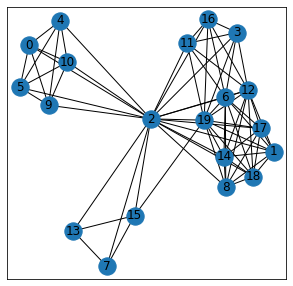


Example graph for genre action


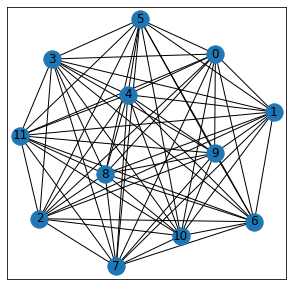

In [7]:
print('Example graph for genre romance')
visualization.visualize(graphs_romance[0])
print()
print('Example graph for genre action')
visualization.visualize(graphs_action[0])

## Graphs from the dataset with extreme properties

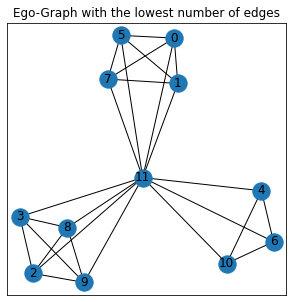

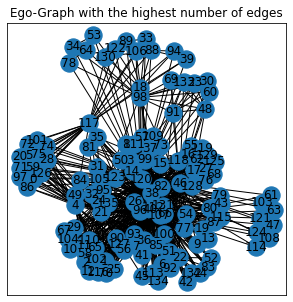

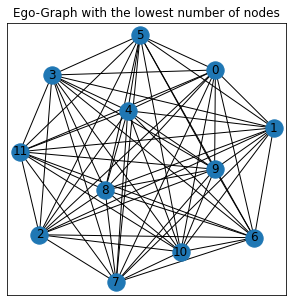

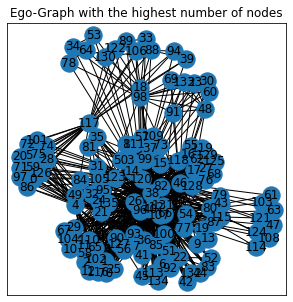

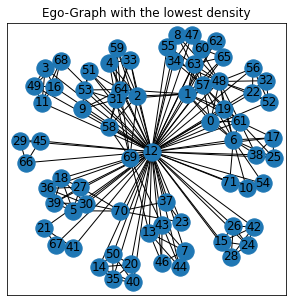

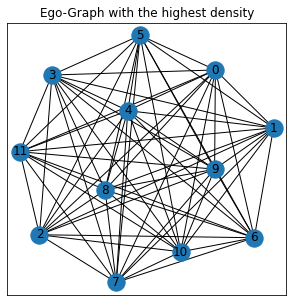

In [8]:
graph_analysis.getExtremeGraphs(imdb_networkx)

## We apply KernelPCA and TruncatedSVD to get a visualisation for our different kernel representations 

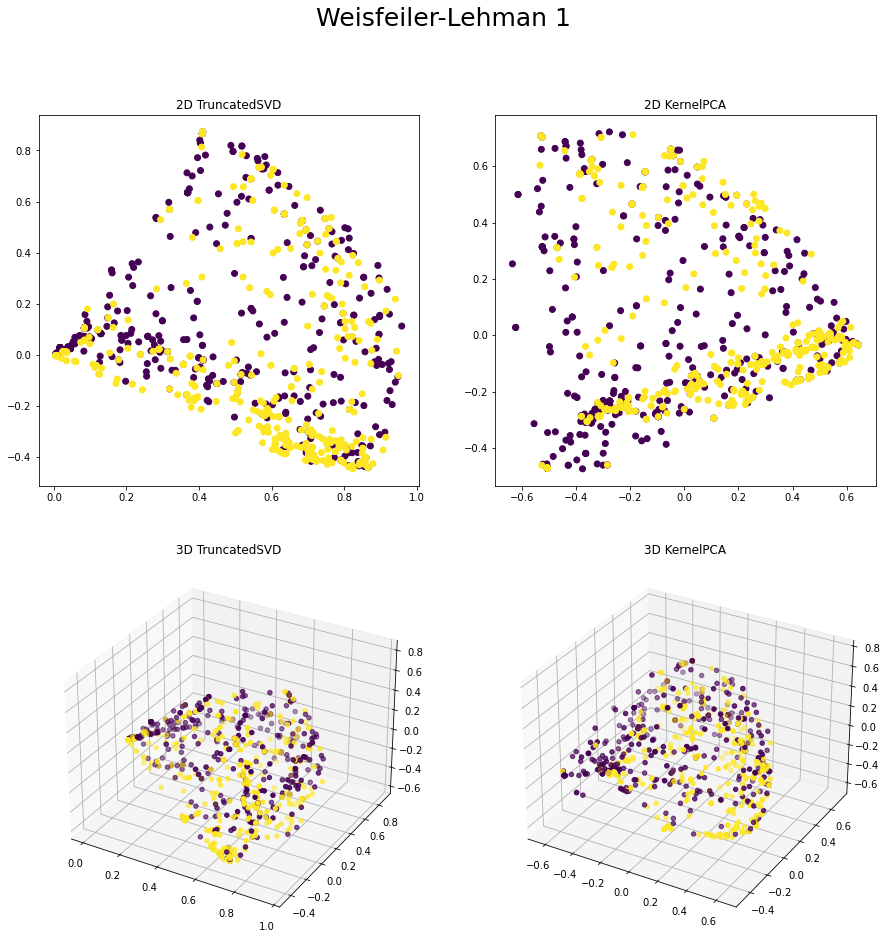

________________________________________________________________________________________



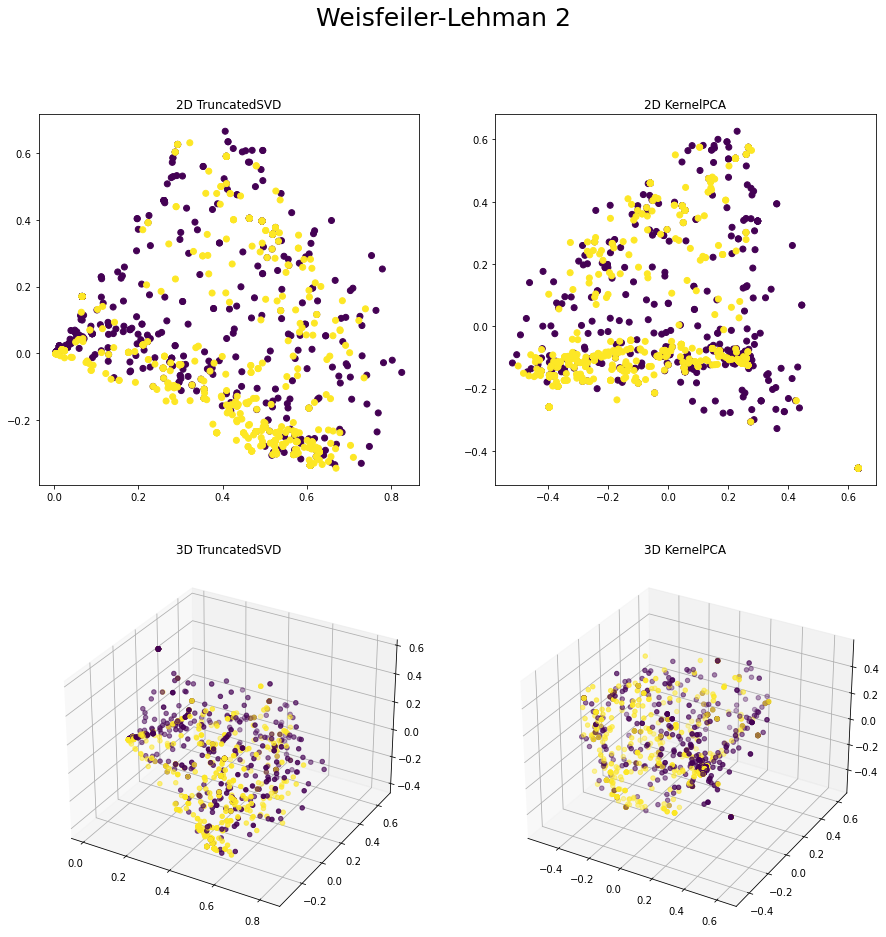

________________________________________________________________________________________



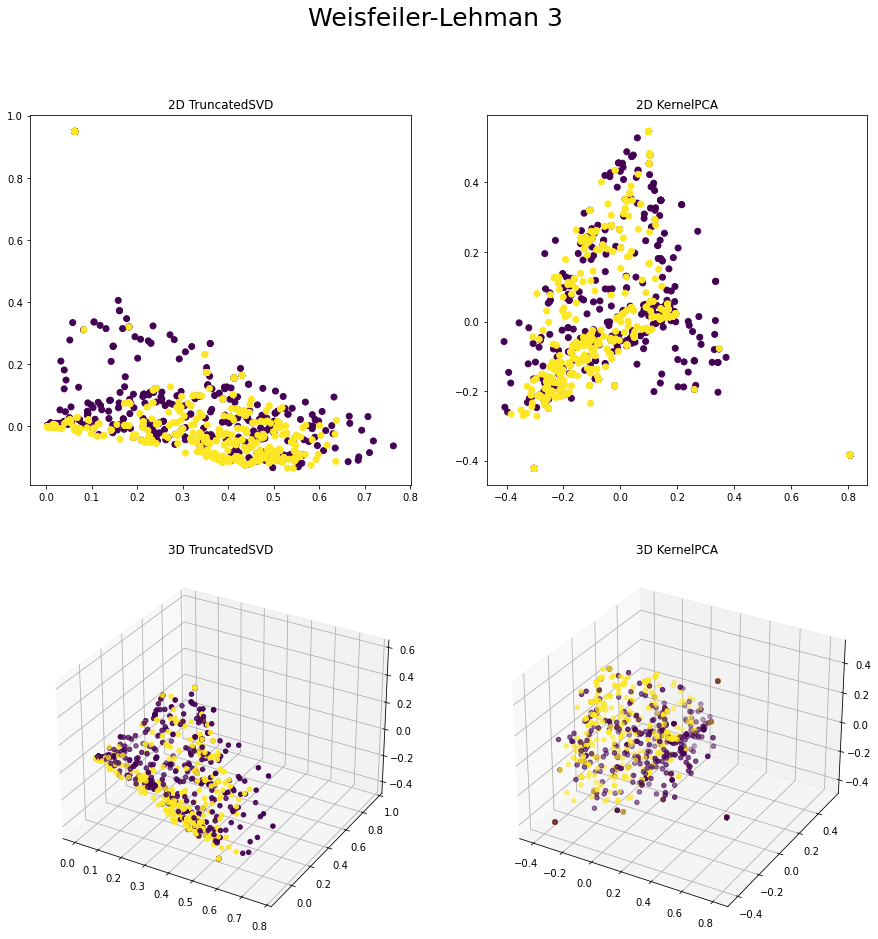

________________________________________________________________________________________



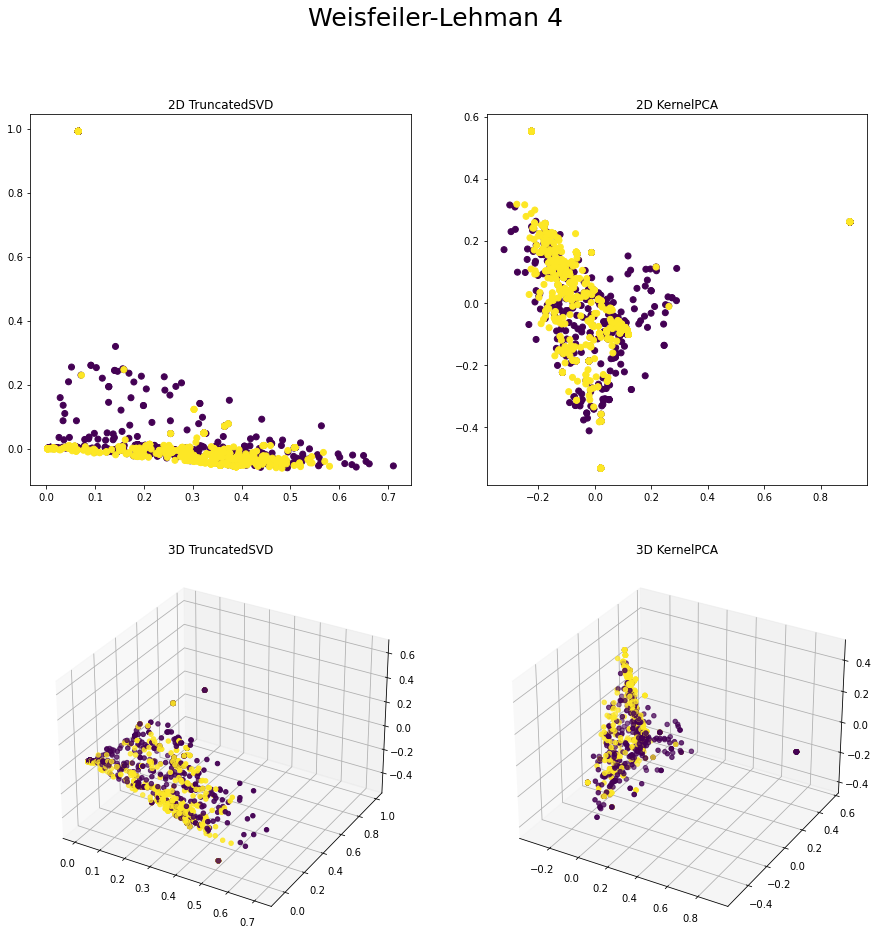

________________________________________________________________________________________



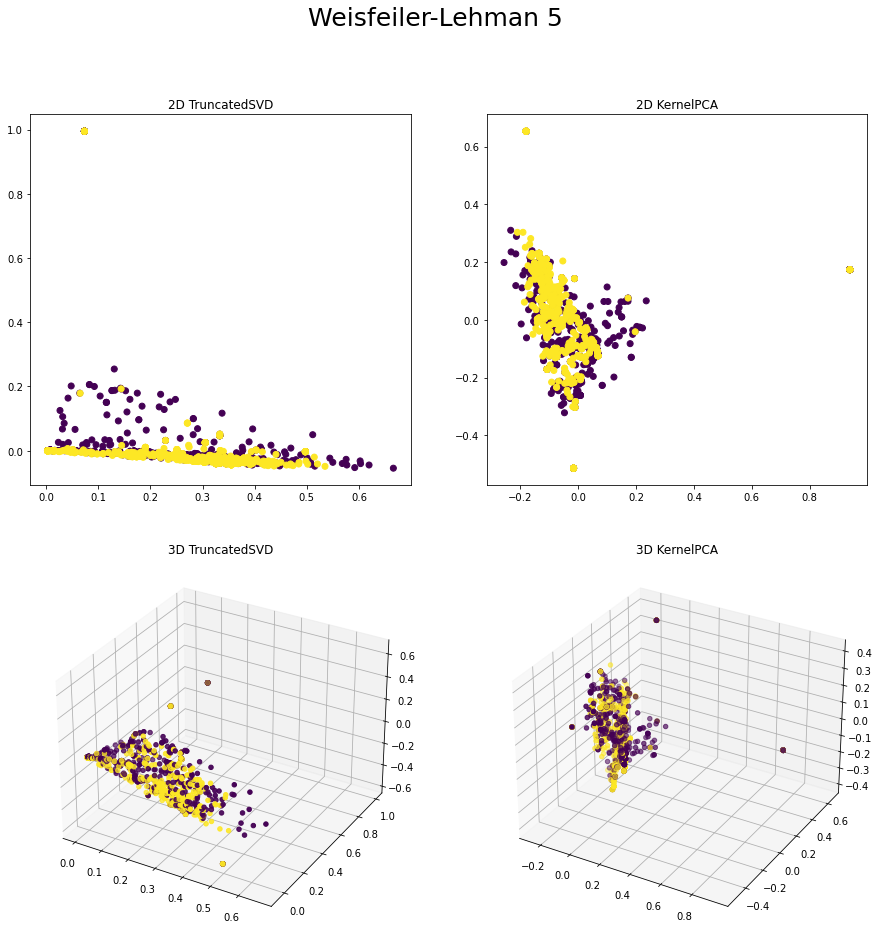

________________________________________________________________________________________



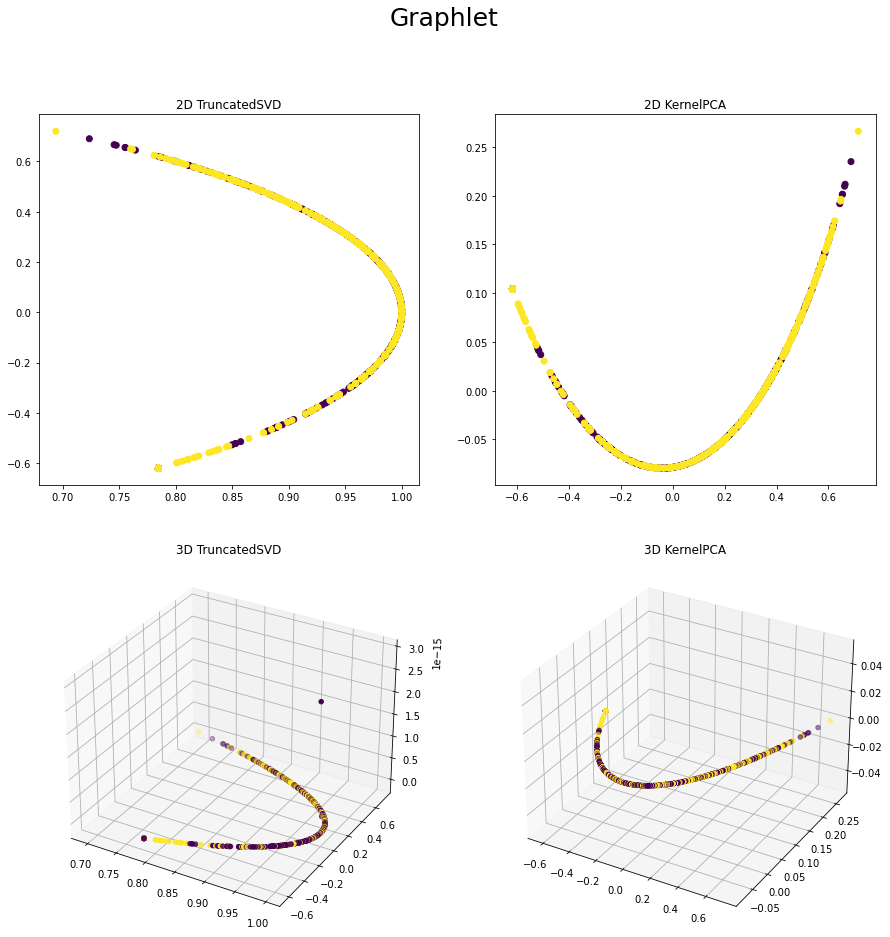

________________________________________________________________________________________



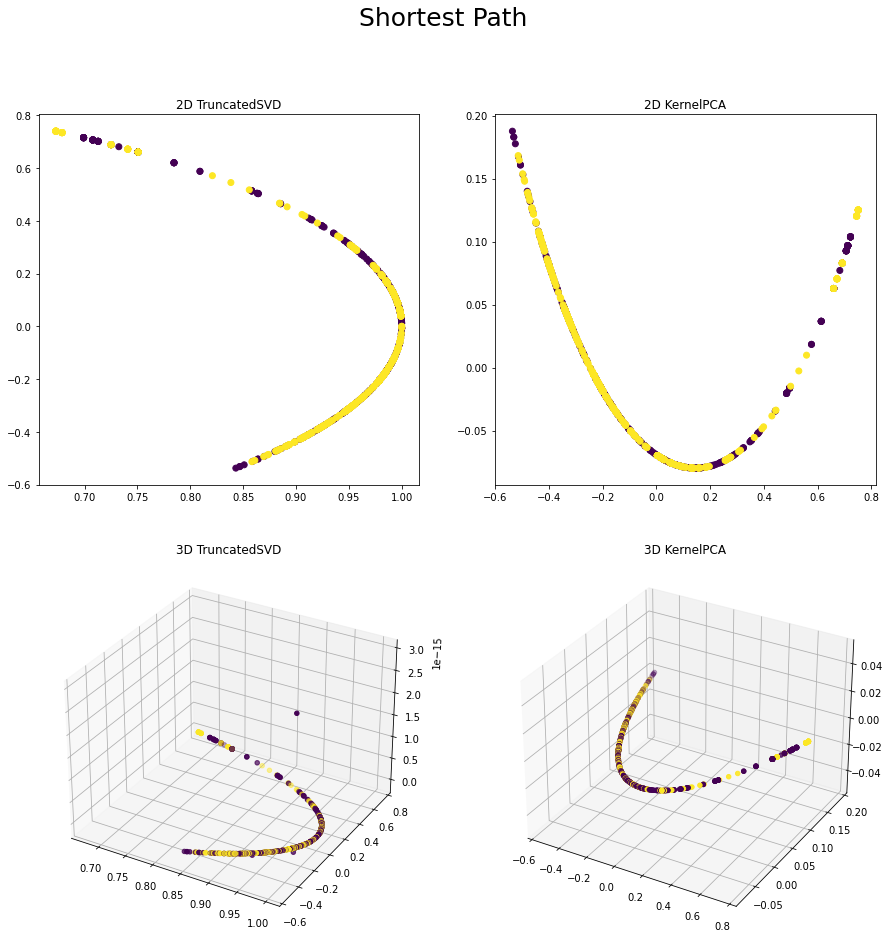

________________________________________________________________________________________



In [9]:
visualization.showEntireDataset(wl_listG, wl_listV, tsvd_graphlet_vectors, kpca_graphlet_gram, tsvd_shortestpath_vectors, kpca_shortestpath_gram, classes)

After analysing the different plots, we noticed the following things:
* The plots show no clear distinction between the classes romance and action for any of the kernel representations
* For the Weisfeller-Lemann representation, the increase in iterations compressed the datapoints to a smaller area
* Each representations has some outliers


Note: Since we have now shown that the shapes of the Weisfeller-Lehman datasets are rather similar, we will only look at dataset "Weisfeller-Lehman 5" in further data analysis.

## How do the corresponding ego-graphs of outliers look like?
To answer this question, we first need to define threshold to remove outliers from each representation. To do this, we created boxplots and then set the thresholds accordingly. 
In the code below we plot one boxplot each for the first two dimentions of the Weisfeiler-Lehman dataset, to help us determine the ranges, that classify datapoints as outliers for that specific data set. After the boxplots, we visualize 3 datasets. The "normal" Weisfeiler-Lehman, Weisfeiler-Lehman without outliers and the outliers of the dataset:

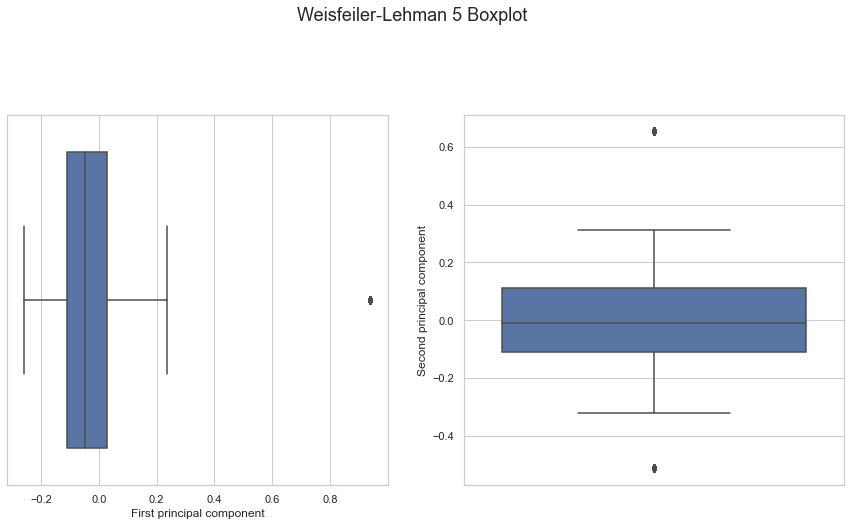

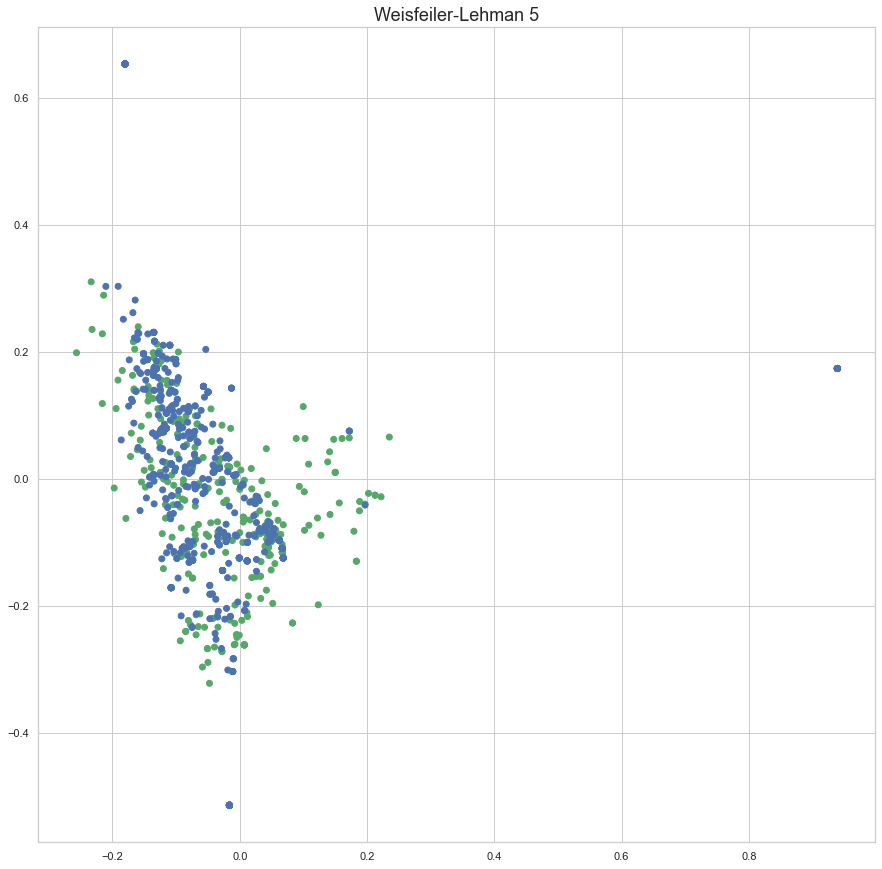

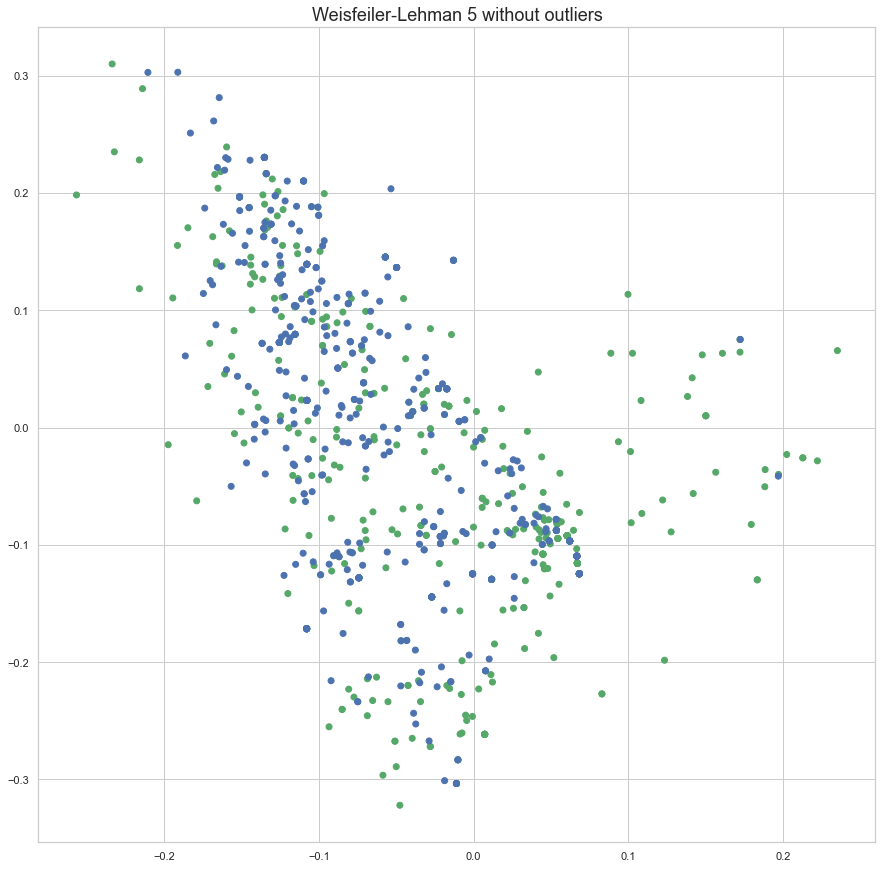

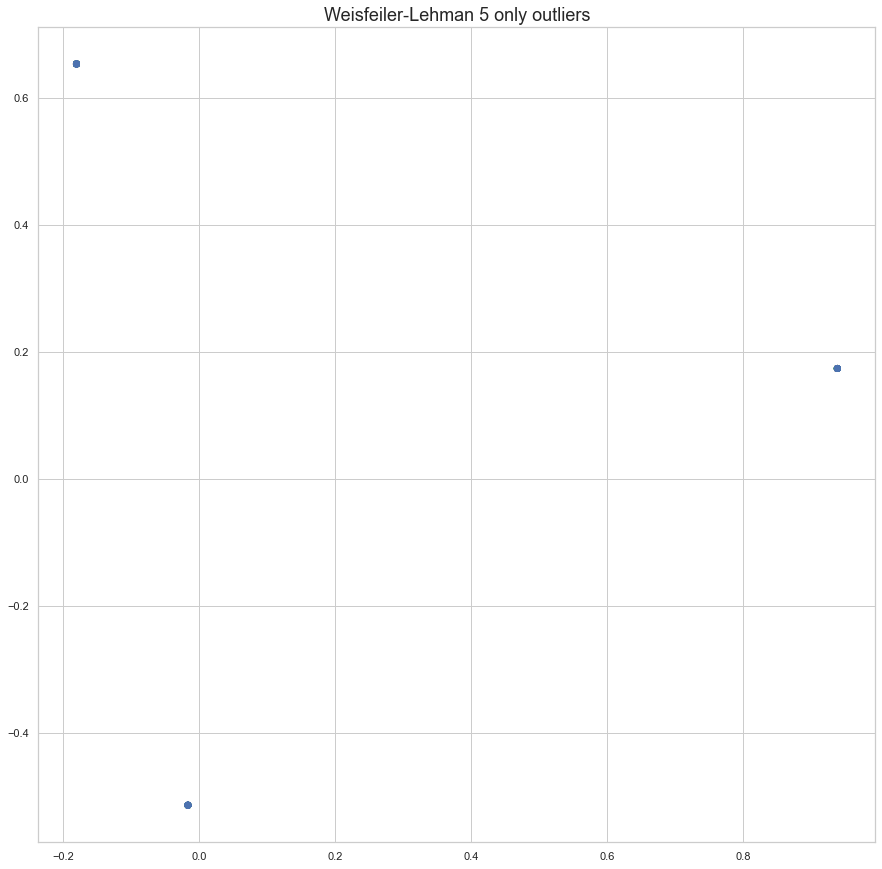

In [10]:
visualization.showBoxplot(kpca_wl5_gram, "Weisfeiler-Lehman 5 Boxplot")

visualization.scatterPlot2DBig(kpca_wl5_gram, "Weisfeiler-Lehman 5", classes)

wl5WithoutOutliers, wl5outlierIndex = outlier_detection.seperateOutliersWithRange(kpca_wl5_gram, -0.3, 0.4, -0.4, 0.4, returnOutliers=False)
visualization.scatterPlot2DBig(wl5WithoutOutliers, "Weisfeiler-Lehman 5 without outliers", classes)


wl5OnlyOutliers, wl5outlierIndex = outlier_detection.seperateOutliersWithRange(kpca_wl5_gram, -0.3, 0.4, -0.4, 0.4, returnOutliers=True)
visualization.scatterPlot2DBig(wl5OnlyOutliers, "Weisfeiler-Lehman 5 only outliers", classes)

In [11]:
outlier_detection.printOutlierCount(wl5outlierIndex, "Analyzing the Weisfeiler-Lehman 5 outliers")


Analyzing the Weisfeiler-Lehman 5 outliers: 
Number of datapoints without outliers:  897
Number of outliers:                     103


In the code below we plot one boxplot each for the first two dimentions of the Shortest Path dataset, to help us determine the ranges, that classify datapoints as outliers for that specific data set. After the boxplots, we visualize 3 datasets. The "normal" Shortest Path, Shortest Path without outliers and the outliers of the dataset:

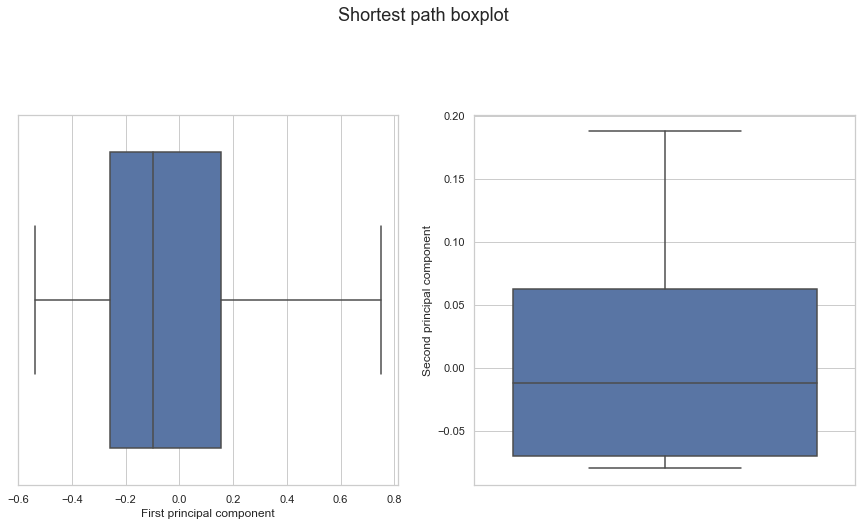

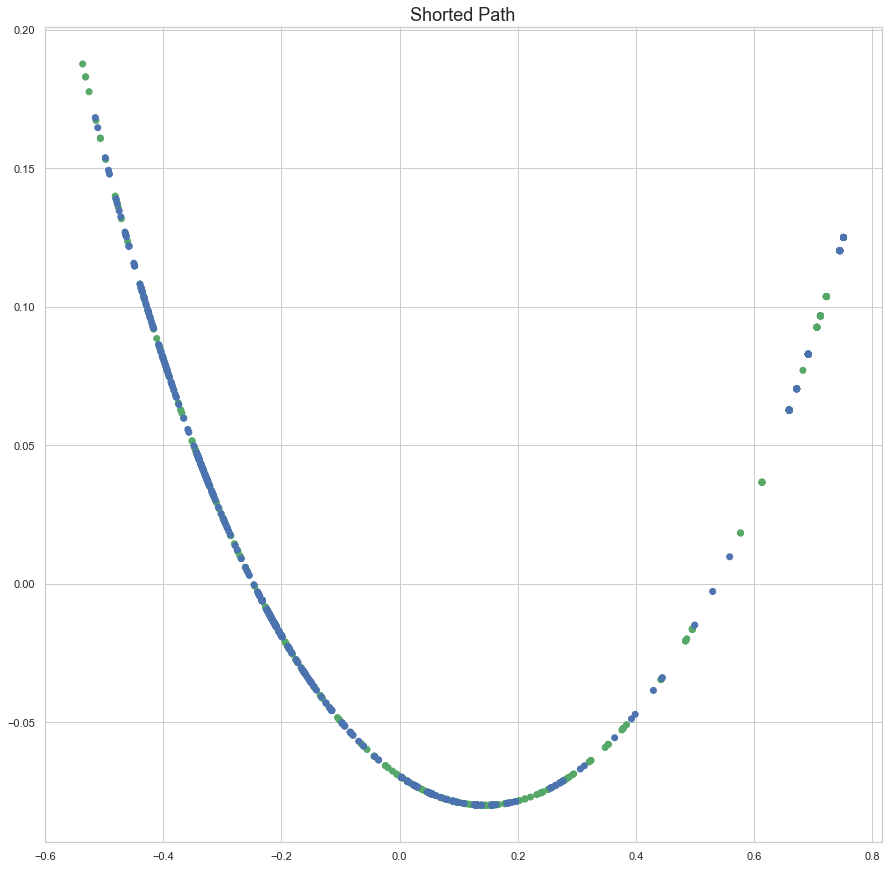

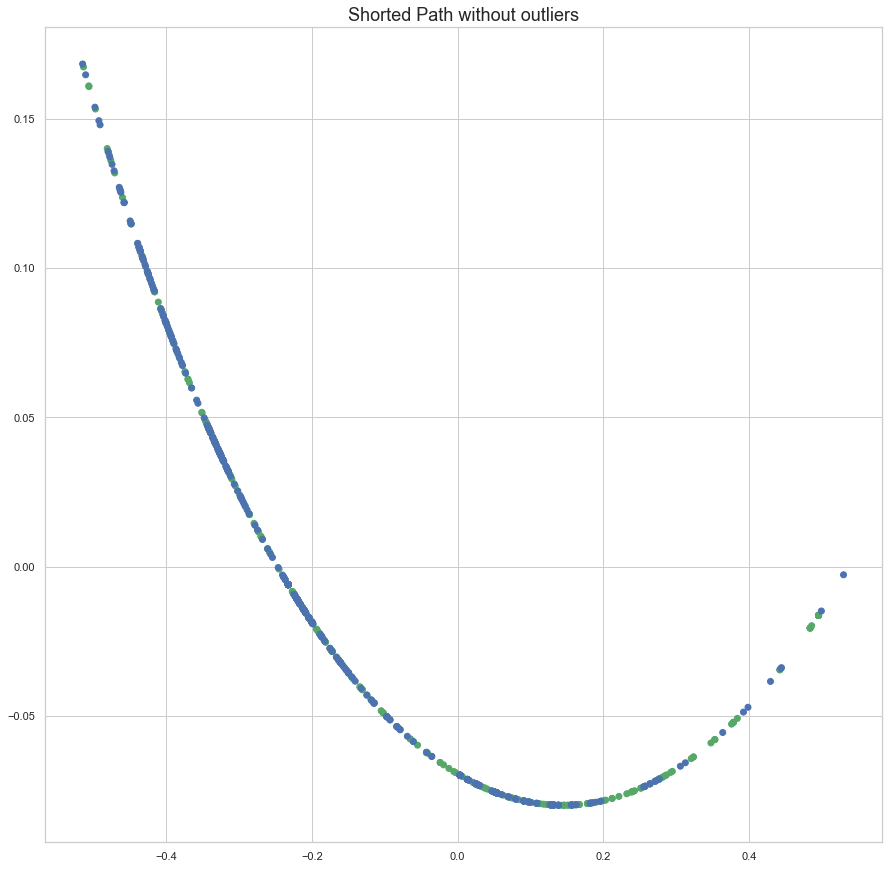

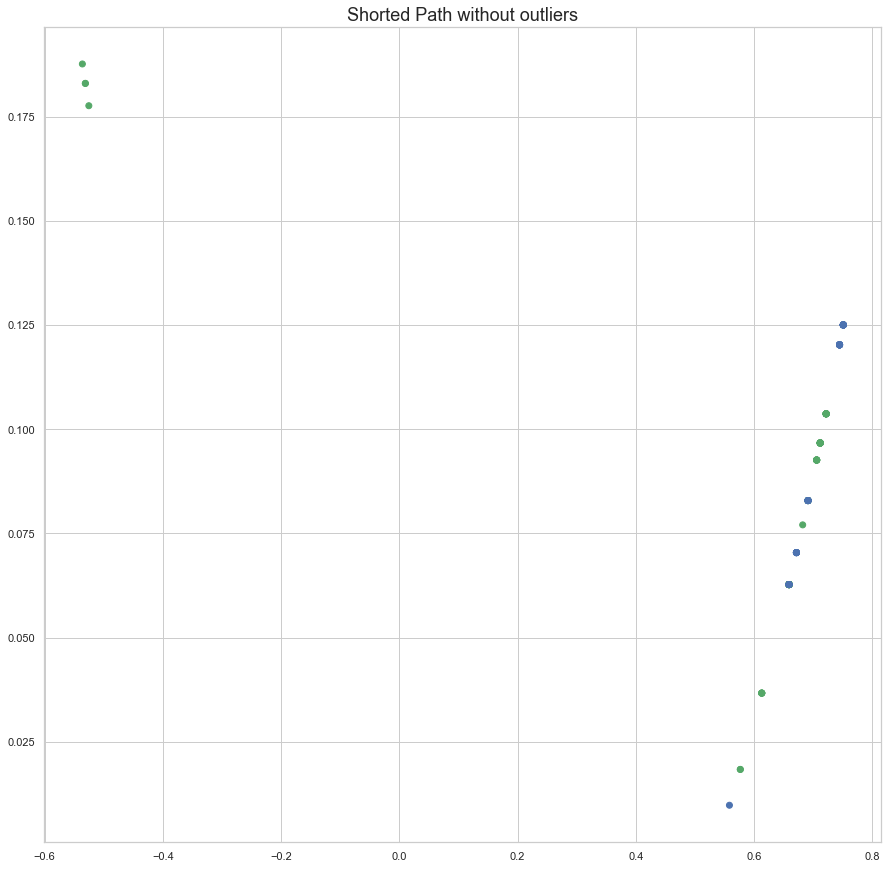

In [12]:
visualization.showBoxplot(kpca_shortestpath_gram, "Shortest path boxplot")

visualization.scatterPlot2DBig(kpca_shortestpath_gram, "Shorted Path", classes)

shortestPathWithoutOutliers, shortestPathOutlierIndex = outlier_detection.seperateOutliersWithRange(kpca_shortestpath_gram, -0.6, 0.55, -0.2, 0.175, returnOutliers=False)
visualization.scatterPlot2DBig(shortestPathWithoutOutliers, "Shorted Path without outliers", classes)

shortestPathOnlyOutliers, shortestPathOutlierIndex = outlier_detection.seperateOutliersWithRange(kpca_shortestpath_gram, -0.6, 0.55, -0.2, 0.175, returnOutliers=True)
visualization.scatterPlot2DBig(shortestPathOnlyOutliers, "Shorted Path without outliers", classes)

In [13]:
outlier_detection.printOutlierCount(shortestPathOutlierIndex, "Analyzing the Shortest Path outliers")


Analyzing the Shortest Path outliers: 
Number of datapoints without outliers:  849
Number of outliers:                     151


In the code below we plot one boxplot each for the first two dimentions of the Graphlet dataset, to help us determine the ranges, that classify datapoints as outliers for that specific data set. After the boxplots, we visualize 3 datasets. The "normal" Graphlet, Graphlet without outliers and the outliers of the dataset:

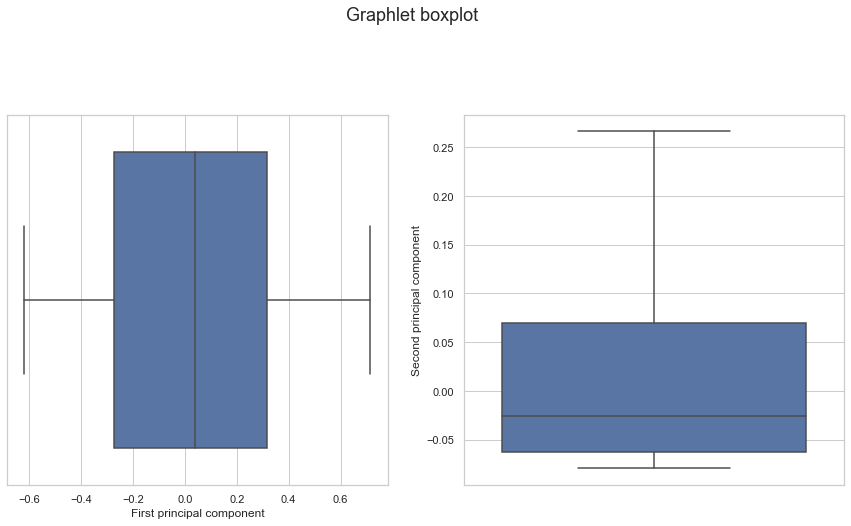

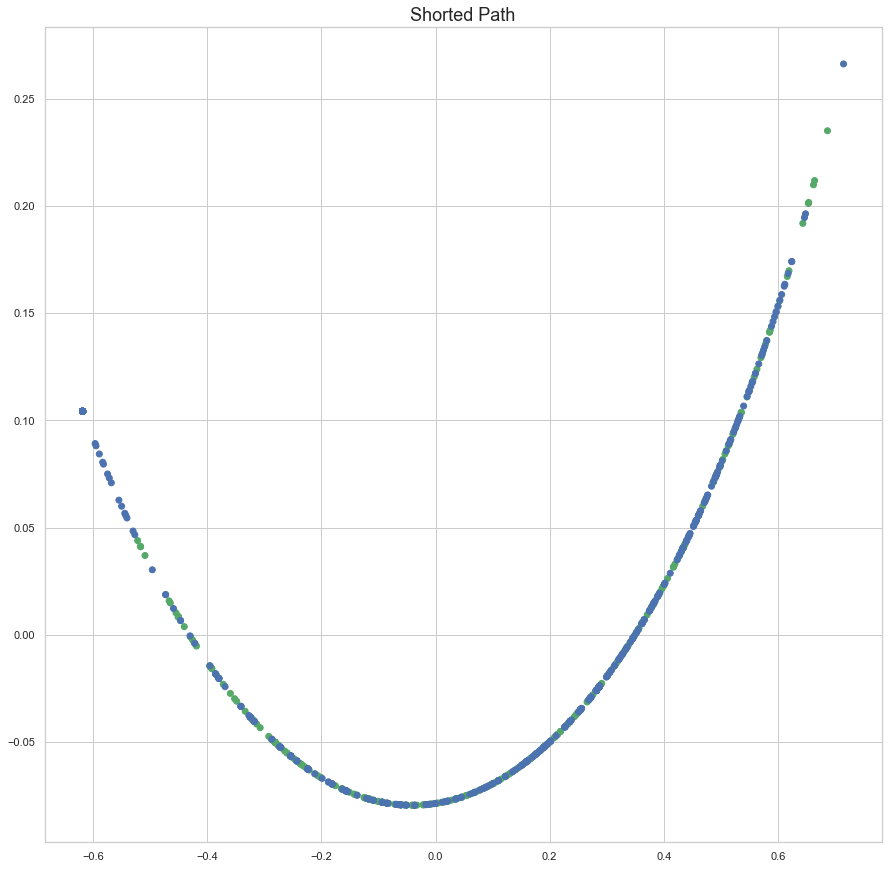

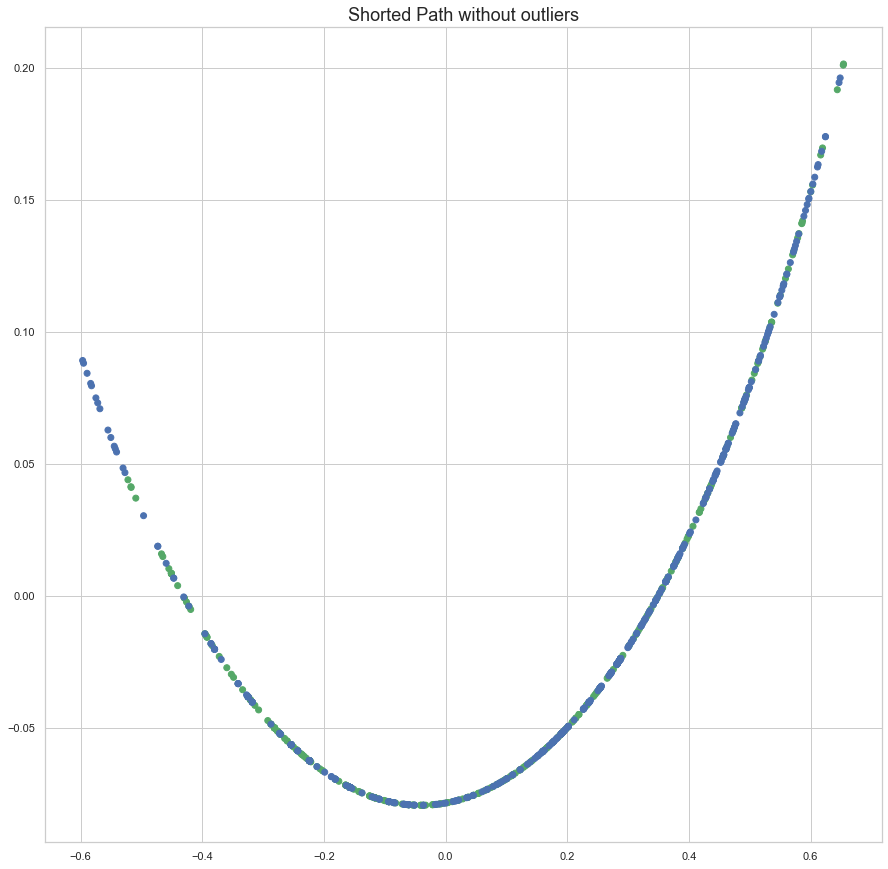

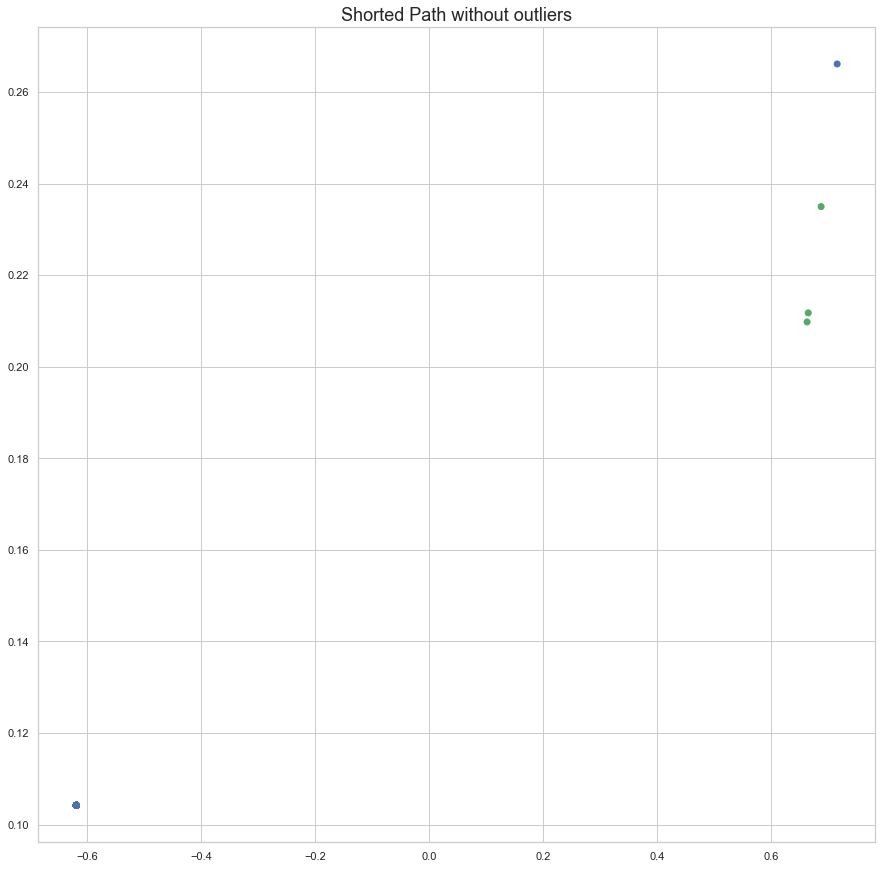

In [14]:
visualization.showBoxplot(kpca_graphlet_gram, "Graphlet boxplot")

visualization.scatterPlot2DBig(kpca_graphlet_gram, "Shorted Path", classes)

graphletWithoutOutliers, graphletOultiersIndex = outlier_detection.seperateOutliersWithRange(kpca_graphlet_gram, -0.6, 0.66, -0.2, 0.22, returnOutliers=False)
visualization.scatterPlot2DBig(graphletWithoutOutliers, "Shorted Path without outliers", classes)

graphletOnlyOutliers, graphletOultiersIndex = outlier_detection.seperateOutliersWithRange(kpca_graphlet_gram, -0.6, 0.66, -0.2, 0.22, returnOutliers=True)
visualization.scatterPlot2DBig(graphletOnlyOutliers, "Shorted Path without outliers", classes)

In [15]:
outlier_detection.printOutlierCount(graphletOultiersIndex, "Analyzing the Graphlet outliers")


Analyzing the Graphlet outliers: 
Number of datapoints without outliers:  857
Number of outliers:                     143


As you have probaly noticed the amount of outliers you see the the visualizations above is way less than the actual number of outliers! Thats because the "what we defined as" **outliers are stacked ontop of each other**. The beste example herefore is the Weisfeller-Lehman 5 outlier plot above, where you can only see three data points, but these are actually 103 data points.

**Note:** We are sticking to the outliers we have found, because they are seperated from the rest of the data. The problem here is, that clustering will be difficult, if several outliers are really close to each other. We will handle this, by looking at datasets without the outliers.

In [16]:
sharedOutliers = [0] * 1000
sharedOutliersBool = [False] * 1000
for i in range(len(imdb_networkx)):
    if wl5outlierIndex[i] == 1 and shortestPathOutlierIndex[i] == 1 and graphletOultiersIndex[i] == 1:
        sharedOutliers[i] = 1
        sharedOutliersBool[i] = True
outlier_detection.printOutlierCount(sharedOutliers, "SHARED OUTLIERS")


SHARED OUTLIERS: 
Number of datapoints without outliers:  952
Number of outliers:                     48


In [17]:
imbd_networkWithoutOutliers = []
imbd_networkOnlyOutliers = []
for i in range(len(imdb_networkx)):
    if sharedOutliers[i] == 1:
        imbd_networkOnlyOutliers.append(imdb_networkx[i])
    else:
        imbd_networkWithoutOutliers.append(imdb_networkx[i])
        
print()
graph_analysis.getGraphDataByClass(imbd_networkWithoutOutliers,'IMDB Network without outliers')


print()
graph_analysis.getGraphDataByClass(imbd_networkOnlyOutliers, 'IMDB Network only outliers')



IMDB Network without outliers: 
Average number of edges:  98.0703781512605
Average number of nodes:  20.164915966386555
Average number of edges per nodes:  4.863416158774808
Average density:  0.4964473990509694
Number of isomorphic pairs:  2228

IMDB Network only outliers: 
Average number of edges:  66.0
Average number of nodes:  12.0
Average number of edges per nodes:  5.5
Average density:  1.0
Number of isomorphic pairs:  1128


If you look at the outliers analysis above, you see that they differ in every detail, in comparison to the network without outliers. Interesting to see is that the average density of the outlier ego-networks is 1. Therefore every node in any outlier ego-network is connected to every other node in the same ego-network.

If you calculate $\binom{48}{2}$, you calculate how many combinations of outlier ego-networks there are. The result (=1128) equals the number of isomorphic pairs in the outlier ego-networks. Resulting that proves, that the outlier ego-networks are all the same.

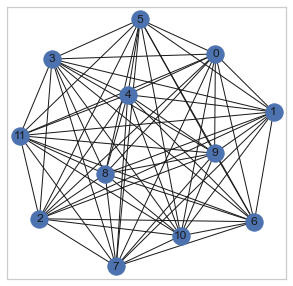

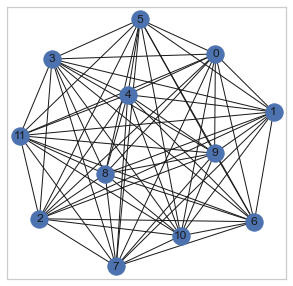

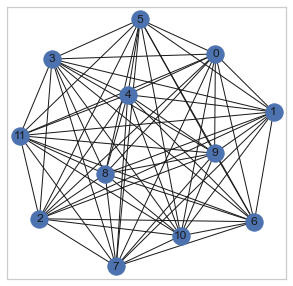

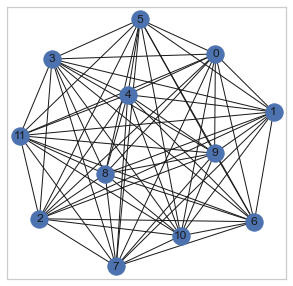

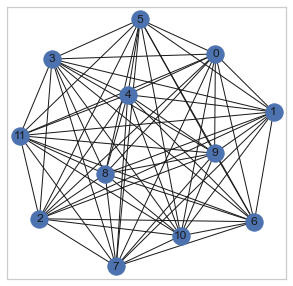

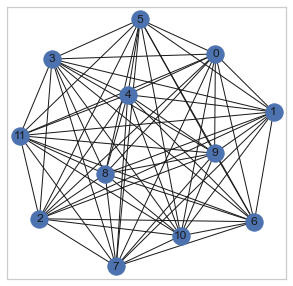

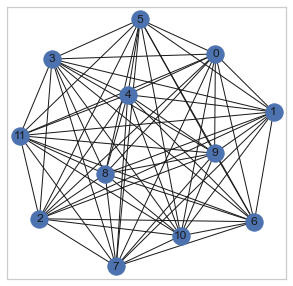

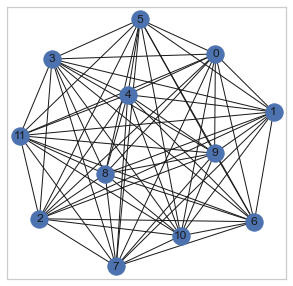

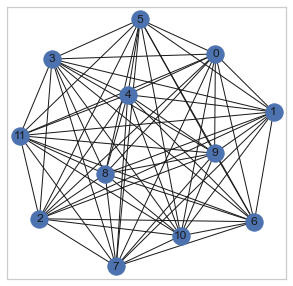

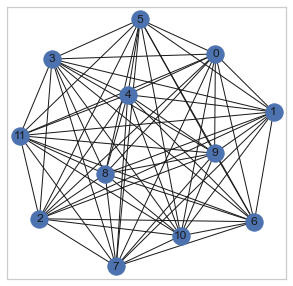

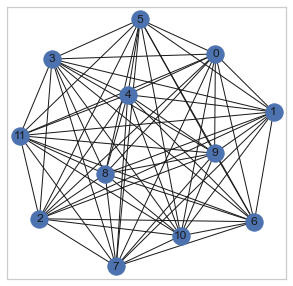

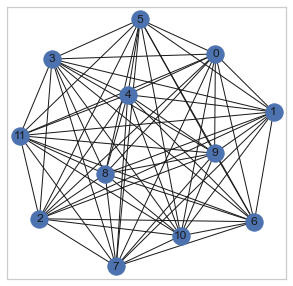

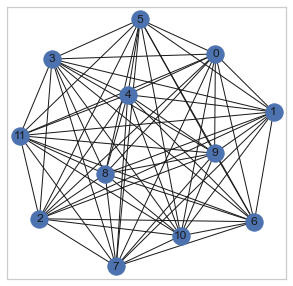

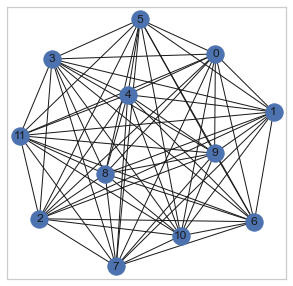

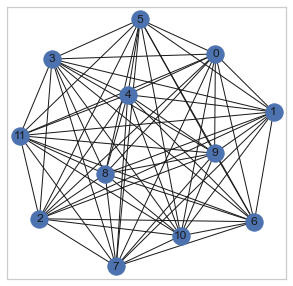

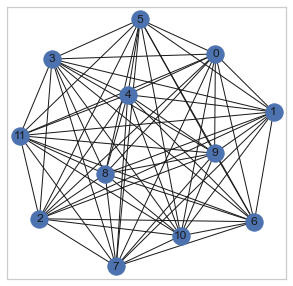

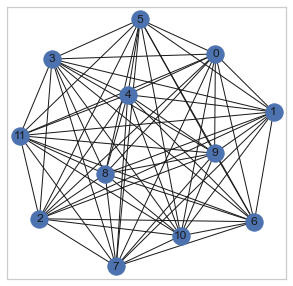

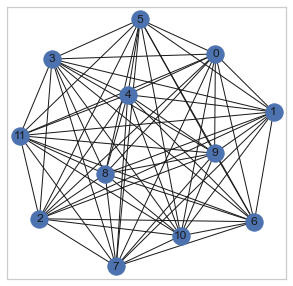

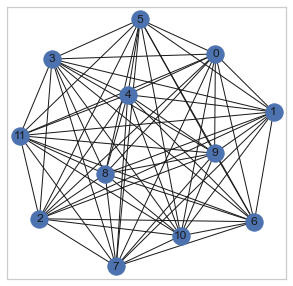

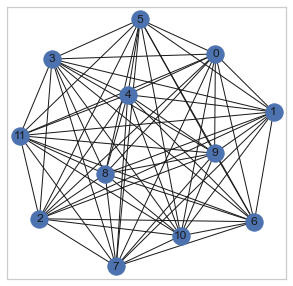

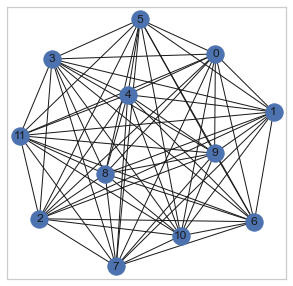

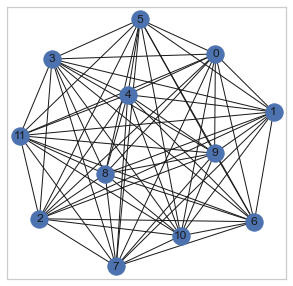

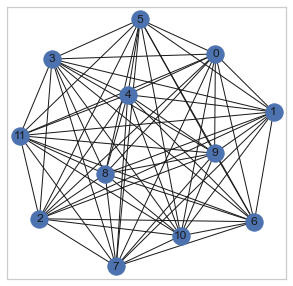

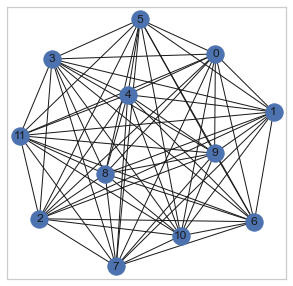

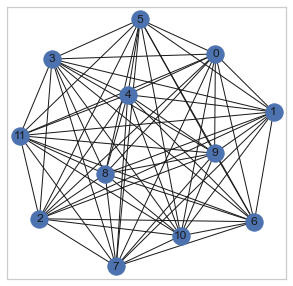

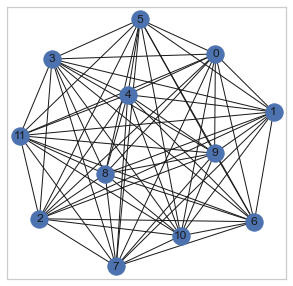

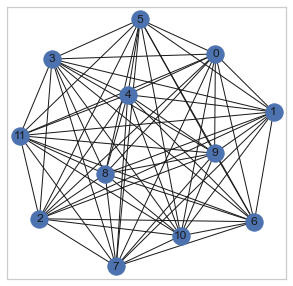

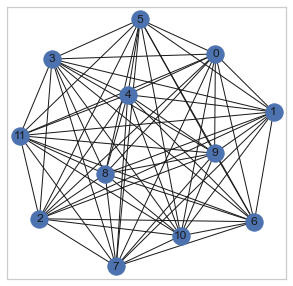

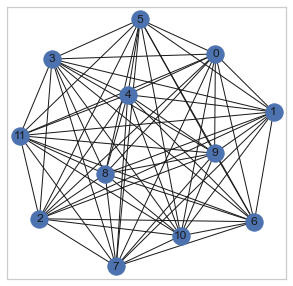

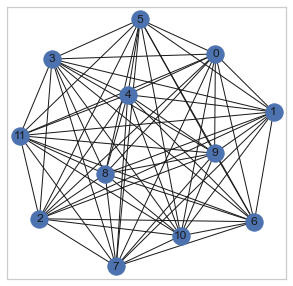

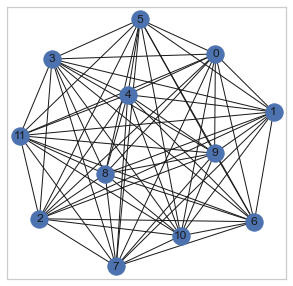

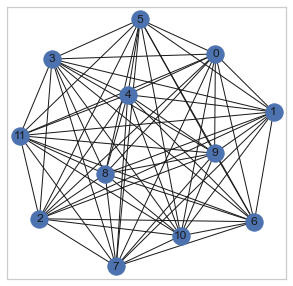

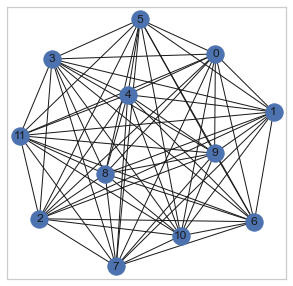

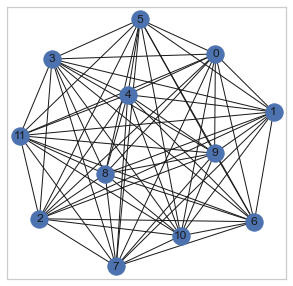

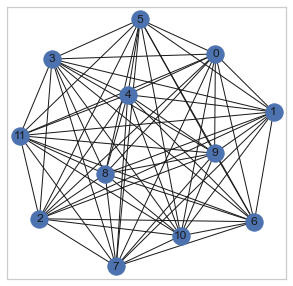

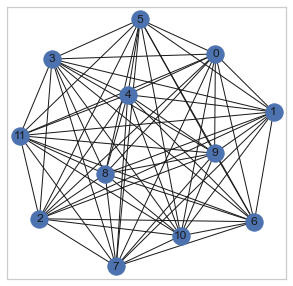

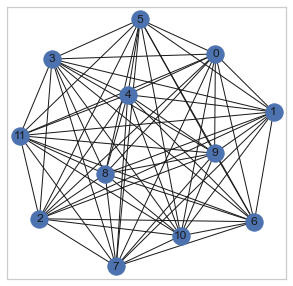

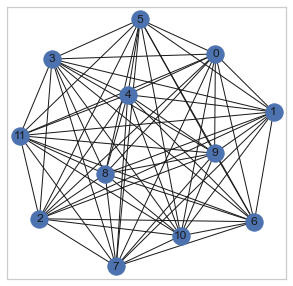

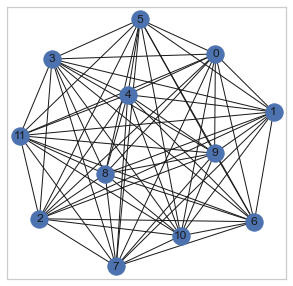

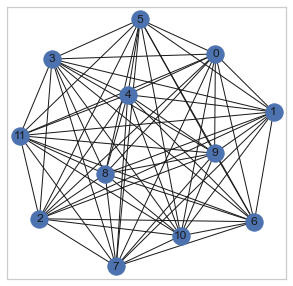

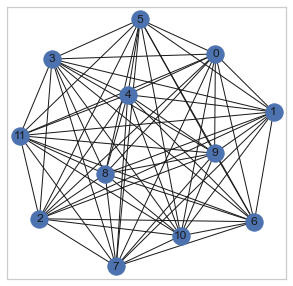

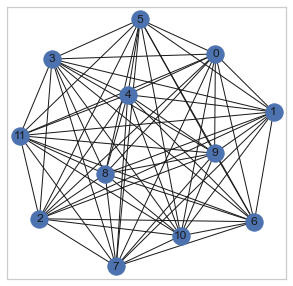

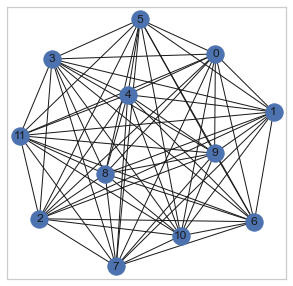

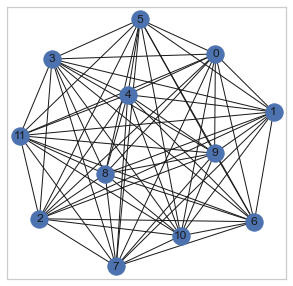

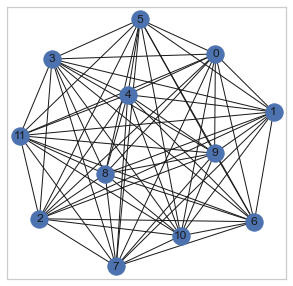

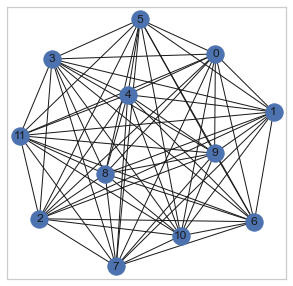

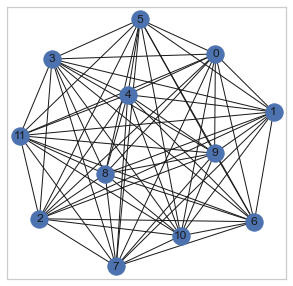

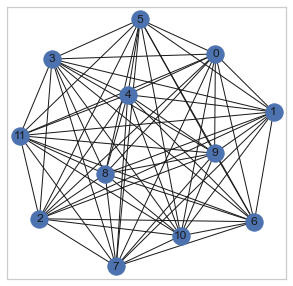

In [18]:
for i in range(0,len(imbd_networkOnlyOutliers)):
    visualization.visualize(imbd_networkOnlyOutliers[i])

# Do  self-developed features help us distinguish between the romance/action clusters when plotting in 2D/3D? 

For this, we created the 3 following three features:
* Density
* Edges
* Nodes

We concatenate each feature seperately to the existing kernel representation of Weisfeller-Lemann 5 and plot the results below compared to the original dataset in 2D and 3D.


In [19]:
kpca_wl5_gram2 = dimensionality_reduction.kernelPCA(imdb_wl5_gram, 2)
kpca_wl5_gram3 = dimensionality_reduction.kernelPCA(imdb_wl5_gram, 3)

In [20]:
allDensities = [nx.density(graph) for graph in imdb_networkx]
allDensities = np.reshape(allDensities, (1000,1))

In [21]:
allEdges = [nx.number_of_edges(graph) for graph in imdb_networkx]
allEdges = np.reshape(allEdges, (1000,1))

In [22]:
allNodes = [nx.number_of_nodes(graph) for graph in imdb_networkx]
allNodes = np.reshape(allNodes, (1000,1))

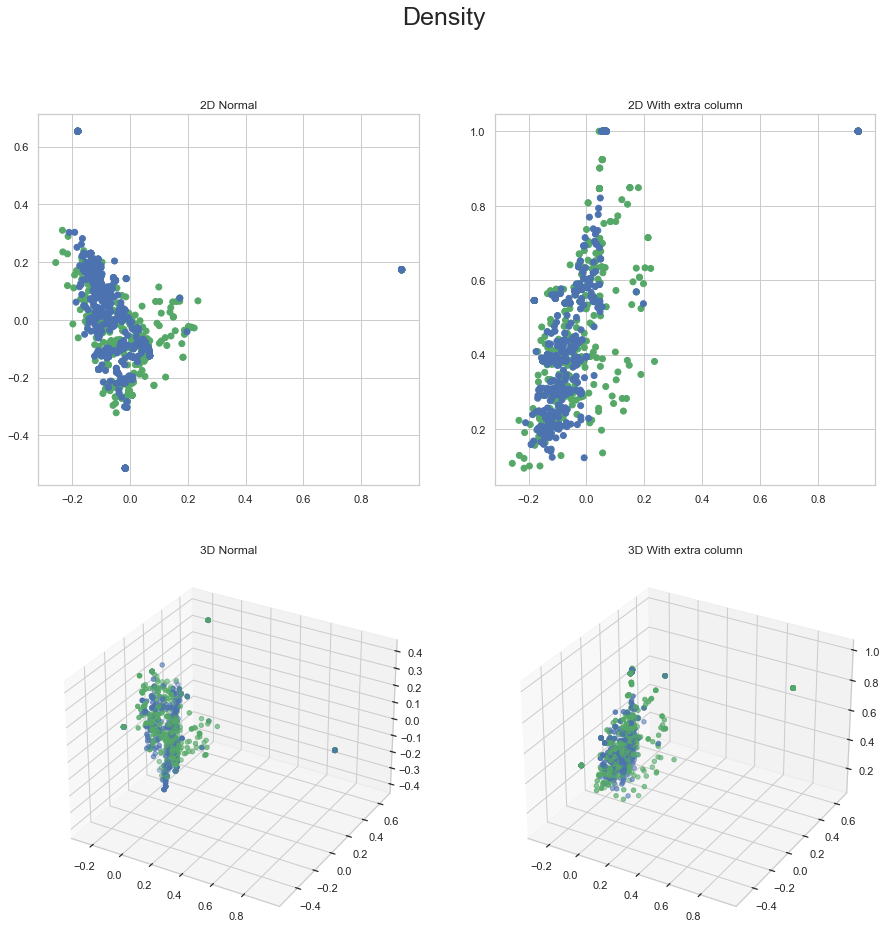

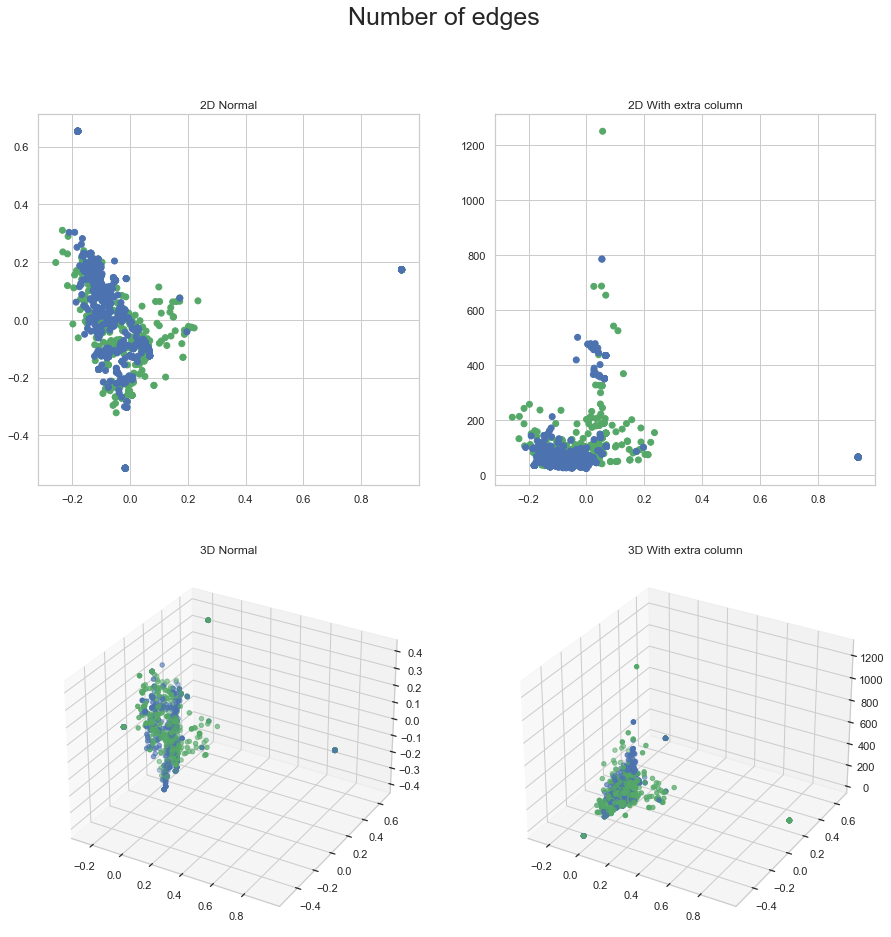

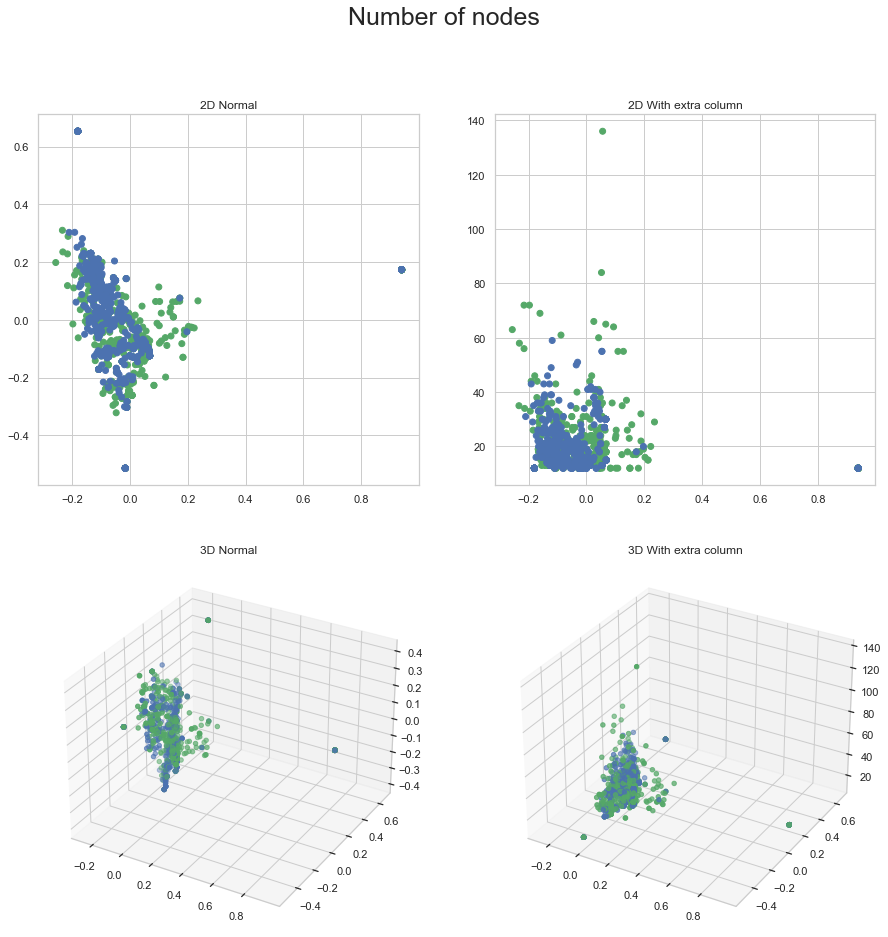

In [23]:
visualization.plotWithExtraColumn(kpca_wl5_gram3, allDensities, classes, "Density")
visualization.plotWithExtraColumn(kpca_wl5_gram3, allEdges, classes, "Number of edges")
visualization.plotWithExtraColumn(kpca_wl5_gram3, allNodes, classes, "Number of nodes")

## Things that we noticed:
* The density feature seems to differ quite a lot and stretches our dataset accordingly
* The number of edges feature seems to be similar for most of the graphs, especially for graphs with labels 'blue' which seem to all cluster together.
* The same can be seen for the number of nodes feature

What we wanted to acheive here is to see it an extra feature is increasing the correctness of the clustering or not. Therefore we decided to make several versions of the Weisfeller-Lehman dataset: 
* Without outliers clustered with kMeans with number of clusters = 2
* Without outliers with Density as an extra feature clustered with kMeans with number of clusters = 2
* The ground truth labels clustered 
* Density as an extra feature clustered with kMeans with number of clusters = 2

In [24]:
kpca_wl5_gram = dimensionality_reduction.kernelPCA(imdb_wl5_gram, 100)
wl5WithoutOutliers = np.delete(wl5WithoutOutliers, np.where(wl5WithoutOutliers[:,0] == None)[0],0)
wl5LabelsReduced = clustering.kMeans(wl5WithoutOutliers[:,0:3],2)

wl5ExtraFeatureReducesLabels = np.append(kpca_wl5_gram2, allDensities, axis=1)
wl5ExtraFeatureReducesLabels = outlier_detection.removeOutliers(wl5ExtraFeatureReducesLabels, wl5outlierIndex)
wl5ExtraFeatureReducesLabels = np.delete(wl5ExtraFeatureReducesLabels, np.where(wl5ExtraFeatureReducesLabels[:,0] == None)[0],0)
wl5ExtraFeatureReducesLabels = clustering.kMeans(wl5ExtraFeatureReducesLabels[:,0:3],2)

classesWl5Reduces = outlier_detection.removeOutliers(classes, wl5outlierIndex)
classesWl5Reduces = np.delete(classesWl5Reduces, np.where(classesWl5Reduces == None)[0],0)

wl5ExtraFeatureLabels = np.append(kpca_wl5_gram2, allDensities, axis=1)
wl5ExtraFeatureLabels = clustering.kMeans(wl5ExtraFeatureLabels,2)

In [25]:
print(normalized_mutual_info_score(classes, clustering.kMeans(kpca_wl5_gram[:,0:10],2)))


0.02389012035992634


0,0239 is the NMI of the gound truth labels and the kMeans of the original data set. Ist result is not optimal. Let's see what the NMI is, when comparing the ground truth with the datasets without outliers:

In [26]:
print(normalized_mutual_info_score(classesWl5Reduces, wl5LabelsReduced))

0.01532774073764057


The NMI got smaller. Therefore, we know that clustering without the outliers gives a worse result.

Let's look at the dataset without outliers and the density as an extra freature attached:

In [27]:
print(normalized_mutual_info_score(classesWl5Reduces, wl5ExtraFeatureReducesLabels))

0.019956507870423697


The NMI is now between the two values from above. So attaching the density helps to cluster better:

In [28]:
print(normalized_mutual_info_score(classes, wl5ExtraFeatureLabels))

0.014713102145335373


This NMI is the worst from all NMIs' above. To conclude you can say, that attaching the density as an extra column only improves the NMI, when the outliers are ignored. If you apply it on the whole dataset, the NMI decreases a lot.

# How well do the clusters agree between each other when comparing the pairwise NMI scores  of the different kernel representation?

We consider the representations WL5, graphlet and shortest path with combined outliers only so each dataset has the same length. We then apply KMeans with different n_cluster parameter to evaluate the loss and find a common n_cluster size. The scree plots for these 3 datasets can be seen below.  

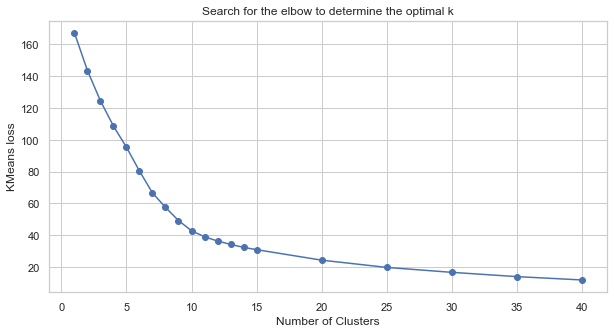

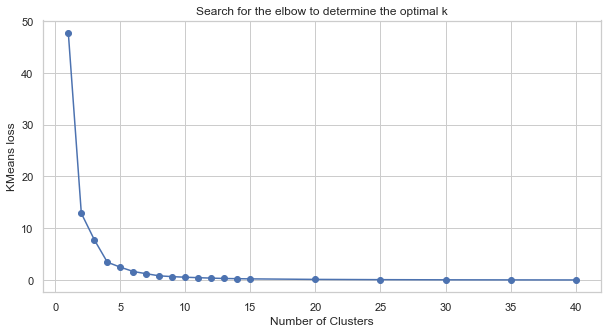

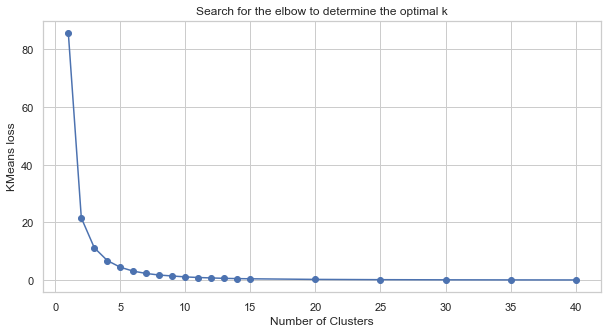

In [29]:

wl5WithoutOutliersReduced = np.delete(wl5WithoutOutliers, np.where(wl5WithoutOutliers[:,0] == None)[0],0)
shortestPathWithoutOutliersReduced = np.delete(shortestPathWithoutOutliers, np.where(shortestPathWithoutOutliers[:,0] == None)[0],0)
graphletWithoutOutliersReduced = np.delete(graphletWithoutOutliers, np.where(graphletWithoutOutliers[:,0] == None)[0],0)

clustering.kMeans_scree_plot(wl5WithoutOutliersReduced)
clustering.kMeans_scree_plot(shortestPathWithoutOutliersReduced)
clustering.kMeans_scree_plot(graphletWithoutOutliersReduced)


In [30]:
wl5WithoutOutliersReduced = np.delete(kpca_wl5_gram, np.where(sharedOutliersBool == True),0)
graphletWithoutOutliersReduced = np.delete(kpca_graphlet_gram, np.where(sharedOutliersBool == True),0)
shortestPathWithoutOutliersReduced = np.delete(kpca_shortestpath_gram, np.where(sharedOutliersBool == True),0)

From the screeplots you can see, that the elbow is wher the biggest kink in the dataset is. For Weisfeller-Lehman it is 8 and for the two other datasets it is 2. Therfore we perform KMeans with the given cluster size (with both 2 & 8) and use the NMI to evaluate the pairwise results:

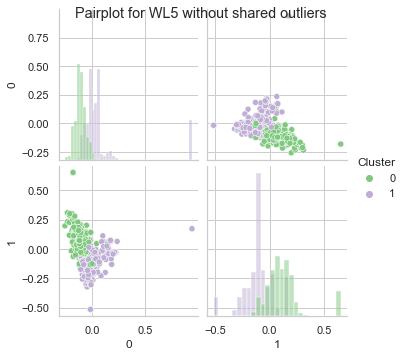

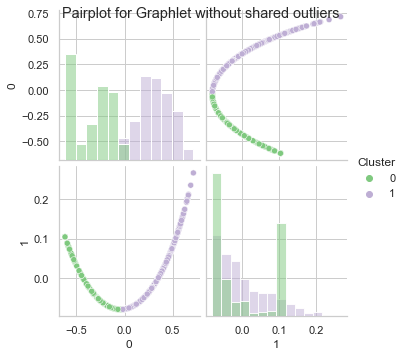

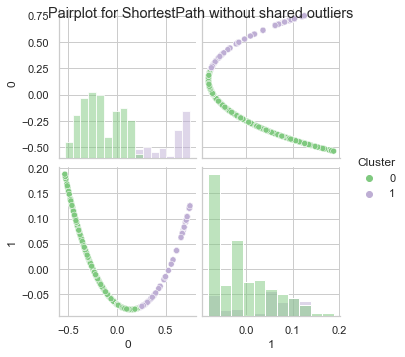

The NMI between Wl5 and Graphlet is:  0.3156401441542938
The NMI between Wl5 and Shortest Path is:  0.24802637918793483
The NMI between Shortest Path and Graphlet is:  0.32360919808076216


In [31]:
from sklearn.metrics import normalized_mutual_info_score
n_clusters = 2
wl5WithoutOutliersReduced_labels = clustering.kMeans(wl5WithoutOutliersReduced[:,0:10],n_clusters)
graphletWithoutOutliersReduced_labels = clustering.kMeans(graphletWithoutOutliersReduced[:,0:10],n_clusters)
shortestPathWithoutOutliersReduced_labels = clustering.kMeans(shortestPathWithoutOutliersReduced[:,0:10],n_clusters)

clustering.showPairPlot(wl5WithoutOutliersReduced[:,0:2],wl5WithoutOutliersReduced_labels,'Pairplot for WL5 without shared outliers')
clustering.showPairPlot(graphletWithoutOutliersReduced[:,0:2],graphletWithoutOutliersReduced_labels,'Pairplot for Graphlet without shared outliers')
clustering.showPairPlot(shortestPathWithoutOutliersReduced[:,0:2],shortestPathWithoutOutliersReduced_labels,'Pairplot for ShortestPath without shared outliers')

print("The NMI between Wl5 and Graphlet is: ",normalized_mutual_info_score(wl5WithoutOutliersReduced_labels,graphletWithoutOutliersReduced_labels))
print("The NMI between Wl5 and Shortest Path is: ",normalized_mutual_info_score(wl5WithoutOutliersReduced_labels,shortestPathWithoutOutliersReduced_labels))
print("The NMI between Shortest Path and Graphlet is: ",normalized_mutual_info_score(shortestPathWithoutOutliersReduced_labels,graphletWithoutOutliersReduced_labels))

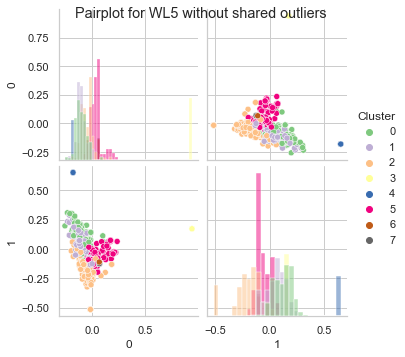

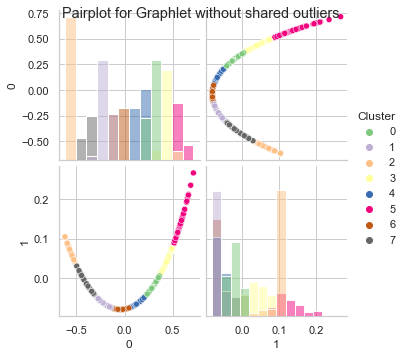

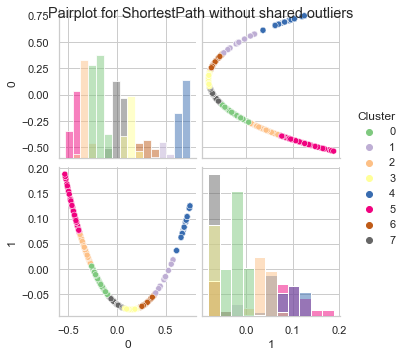

The NMI between Wl5 and Graphlet is:  0.32836791000730414
The NMI between Wl5 and Shortest Path is:  0.3031138921425941
The NMI between Shortest Path and Graphlet is:  0.5570668761941119


In [32]:
n_clusters = 8
wl5WithoutOutliersReduced_labels = clustering.kMeans(wl5WithoutOutliersReduced[:,0:10],n_clusters)
graphletWithoutOutliersReduced_labels = clustering.kMeans(graphletWithoutOutliersReduced[:,0:10],n_clusters)
shortestPathWithoutOutliersReduced_labels = clustering.kMeans(shortestPathWithoutOutliersReduced[:,0:10],n_clusters)

clustering.showPairPlot(wl5WithoutOutliersReduced[:,0:2],wl5WithoutOutliersReduced_labels,'Pairplot for WL5 without shared outliers')
clustering.showPairPlot(graphletWithoutOutliersReduced[:,0:2],graphletWithoutOutliersReduced_labels,'Pairplot for Graphlet without shared outliers')
clustering.showPairPlot(shortestPathWithoutOutliersReduced[:,0:2],shortestPathWithoutOutliersReduced_labels,'Pairplot for ShortestPath without shared outliers')

print("The NMI between Wl5 and Graphlet is: ",normalized_mutual_info_score(wl5WithoutOutliersReduced_labels,graphletWithoutOutliersReduced_labels))
print("The NMI between Wl5 and Shortest Path is: ",normalized_mutual_info_score(wl5WithoutOutliersReduced_labels,shortestPathWithoutOutliersReduced_labels))
print("The NMI between Shortest Path and Graphlet is: ",normalized_mutual_info_score(shortestPathWithoutOutliersReduced_labels,graphletWithoutOutliersReduced_labels))

As you can see all the NMI scores increase significantly when increasing the number of clusters from 2 to 8. That means, that the found labels are better (more equal) if you analyze the dataset with more clusters.